<a href="https://colab.research.google.com/github/ashwinichidurala/stml-asssignment/blob/main/FUEL_ALL_ALGORITHMS_T_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
d=pd.read_csv('/content/AIML FUEL DATASET.CSV')
print(d)

Mounted at /content/gdrive
       YEAR  ENGINE SIZE  CYLINDERS  FUELTYPE  FUEL CONSUMPTION  \
0      2000          106          4         0               902   
1      2000          106          4         0               805   
2      2000          302          6         1              1202   
3      2000          305          6         1              1304   
4      2000          108          4         0                10   
...     ...          ...        ...       ...               ...   
22551  2022            2          4         1              1007   
22552  2022            2          4         1              1005   
22553  2022            2          4         1                11   
22554  2022            2          4         1              1105   
22555  2022            2          4         1              1204   

       HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  EMISSIONS  
0                 607              801          35        186  
1                 605              706  

**BOXPLOT**

<Axes: xlabel='FUEL CONSUMPTION'>

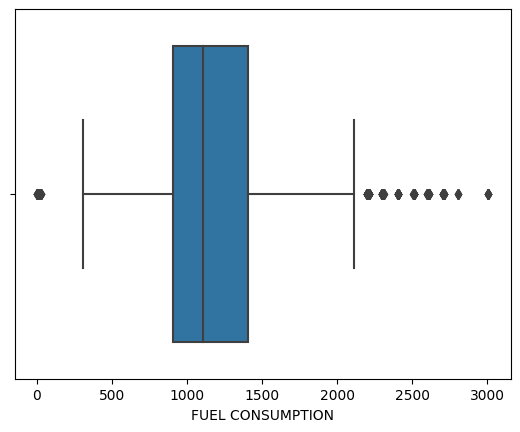

In [ ]:
import seaborn as sns
sns.boxplot(data=d,x='FUEL CONSUMPTION')

**PY PLOT**

<Axes: xlabel='HWY (L/100 km)', ylabel='COMB (mpg)'>

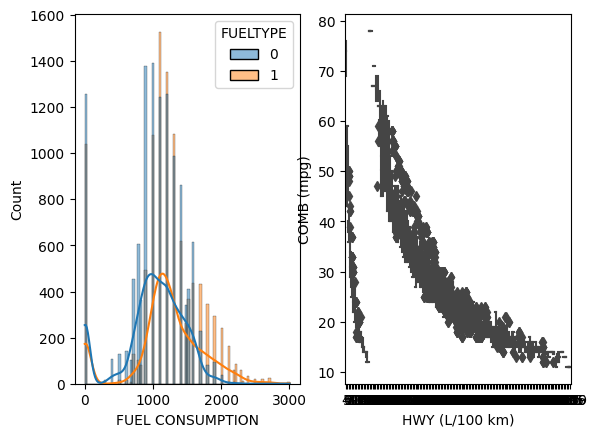

In [ ]:
from matplotlib import pyplot as plt
fig, ax=plt.subplots(1,2)
sns.histplot(data=d ,x=d['FUEL CONSUMPTION'],hue=d['FUELTYPE'], kde=True ,ax=ax[0] )
sns.boxplot(x=d['HWY (L/100 km)'],y=d['COMB (mpg)'] ,ax=ax[1])

**CORELATION MATRIX**

In [ ]:
corr_matrix=d.corr()
print(corr_matrix)

                      YEAR  ENGINE SIZE  CYLINDERS  FUELTYPE  \
YEAR              1.000000    -0.142123  -0.072607  0.081352   
ENGINE SIZE      -0.142123     1.000000   0.554940 -0.010648   
CYLINDERS        -0.072607     0.554940   1.000000  0.280275   
FUELTYPE          0.081352    -0.010648   0.280275  1.000000   
FUEL CONSUMPTION -0.072907     0.342305   0.497971  0.186841   
HWY (L/100 km)   -0.009965     0.307805   0.443589  0.123434   
COMB (L/100 km)  -0.043549     0.337162   0.486098  0.167600   
COMB (mpg)        0.079989    -0.486610  -0.714215 -0.259583   
EMISSIONS        -0.047869     0.514010   0.802176  0.182658   

                  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  \
YEAR                     -0.072907       -0.009965        -0.043549   
ENGINE SIZE               0.342305        0.307805         0.337162   
CYLINDERS                 0.497971        0.443589         0.486098   
FUELTYPE                  0.186841        0.123434         0.167600   
FUEL

**CO VARIANCE MATRIX**

<function matplotlib.pyplot.show(close=None, block=None)>

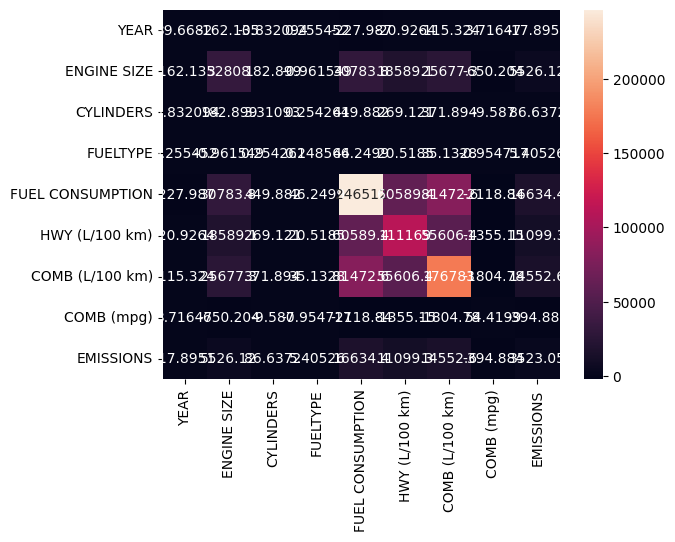

In [ ]:
cov_matrix=pd.DataFrame.cov(d)
sns.heatmap(cov_matrix,annot=True,fmt='g')
plt.show

**HEAT MAP**

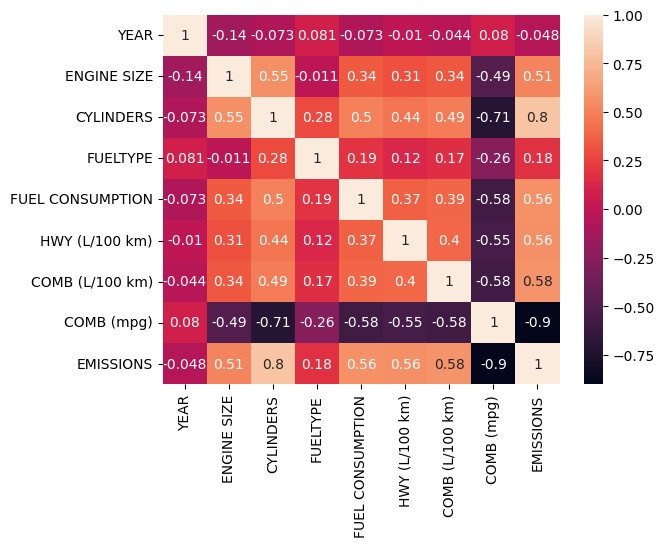

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix,annot=True)
plt.show()

**LINEAR REGRESSION**

In [ ]:
x=d.iloc[:,:-1].values
y=d.iloc[:,-1:].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)#42

In [ ]:
#Normalising the data - Standard Scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(xtrain)   #Normalizing
X_test=sst.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
ypred=model.predict(xtest)

In [ ]:
ypred

array([168, 225, 230, ..., 232, 255, 225])

In [ ]:
xtest

array([[2003,  105,    4, ...,    6,  703,   39],
       [2014,  205,    4, ...,  602,  703,   39],
       [2006,  202,    4, ...,  601,    8,   35],
       ...,
       [2006,    3,    6, ...,  905, 1106,   24],
       [2012,  507,    8, ...,   11, 1306,   21],
       [2001,  202,    4, ...,  701,  809,   32]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, ypred))

Confusion Matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy :  0.07731867352367441


In [ ]:
model.score(x,y)

0.07452562511083526

KNN ALGORITHM

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25,random_state = 0)

In [ ]:
#normalizing(to transform features to be o a similar scale) the data-standardscaler
# standardscaler it helps converting all numerical values into the one range
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30) #20 is k value

In [ ]:
knn.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
print("predicted value for training value",knn.score(xtrain,ytrain))
print("predicted value for testing value",knn.score(xtest,ytest))
print(" accuracy value",knn.score(sc_x.transform(x),y))


predicted value for training value 0.32813146538984456
predicted value for testing value 0.2530590530235857
 accuracy value 0.3093633622982798


In [ ]:
from sklearn.metrics import confusion_matrix
knns=confusion_matrix(ytest,y_pred)
print("Confusion matrix:\n",knns)

Confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy",dtc.score(xtrain,ytrain))
print("Testing Accuracy",dtc.score(xtest,ytest))
print("Overall Accuracy:",dtc.score(sst.transform(x),y))

Training Accuracy 0.9950345805993971
Testing Accuracy 0.857066855825501
Overall Accuracy: 0.960542649405923


In [ ]:
y_pred=dtc.predict(xtest)
y_pred

array([168, 168, 184, ..., 267, 313, 205])

In [ ]:
from sklearn.metrics import confusion_matrix
dtcs=confusion_matrix(ytest,y_pred)
print("Confusion matrix:\n",dtcs)

Confusion matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


Linear Reegreesion
****

In [40]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
print("Training Accuracy",dtc.score(xtrain,ytrain))
print("Testing Accuracy",dtc.score(xtest,ytest))
print("Overall Accuracy:",dtc.score(sc_x.transform(x),y))

Training Accuracy 0.9950345805993971
Testing Accuracy 0.857066855825501
Overall Accuracy: 0.960542649405923
